# Uge 6: Ekstrema og Optimering

Demo af Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen og Magnus Troen

In [1]:
from sympy import *
from dtumathtools import *
init_printing()

Når man skal til at undersøge ekstrema af en funktion $f:\Omega \to \mathbb{R}$ er der i princippet 3 områder, som skal undersøges. I Theorem 5.2.2 beskrives de ved

1. $\boldsymbol{x}_0 \in \partial \Omega \cap \Omega$ (altså min og/eller max kan være et punkt på randen af definitionsmængden $\Omega$)
1. $\boldsymbol{x}_0$ er et punkt hvor $f$ **ikke** differentiabel (kladet undtagelsespunkt i det følgende)
1. $\boldsymbol{x}_0$ er et punkt hvor $f$ er differentiabel og $\nabla f(\boldsymbol{x}_0) = 0$ (kaldet et stationært punkt)

## Lokale ekstrema, eksempel 1

Vi vil forsøge at finde alle ekstremumspunkter for funktionen $f: \mathbb{R}^2 \to \mathbb{R}$ givet ved:

\begin{equation*}
f(x,y) = x^3 - 3x^2 + y^3 - 3y^2.
\end{equation*}

Vi bemærker at $f$ er defineret og differentiabel på alle punkter i $\mathbb{R}^2$. Der er alstå ingen rand- eller undtagelsespunkter, vi bør undersøge.

Derfor kan vi nøjes med at undersøge de stationære punkter, der er givet ved løsningen til ligningerne:

In [2]:
x,y = symbols("x y", real=True)
f =  x**3 - 3 * x**2 + y**3 - 3 * y**2
lign1 = Eq(f.diff(x),0)
lign2 = Eq(f.diff(y),0)
display(lign1,lign2)

Disse ligninger er ikke-lineære, men løses alligevel let, enten i hånden eller i SymPy:

In [3]:
sols = nonlinsolve([lign1, lign2], [x,y])
sols

Nu har vi vores stationære punkter. Nu kan vi finde de partielt afledede af 2. orden og opstille Hessematricen.

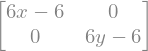

In [4]:
H = dtutools.hessian(f)
H

Derefter indsættes de stationære punkter, og egenværdierne for $\boldsymbol{H}_f$ undersøges, hvilket er nemt, da $H$ allerede er *diagonaliseret*, og egenværdierne derfor direkte kan aflæses af matricen.

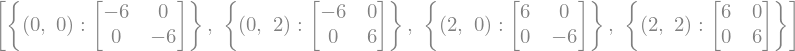

In [5]:
[{(x0, y0): H.subs([(x,x0),(y,y0)])} for (x0,y0) in sols]

Theorem 5.2.4 fortæller os nu at $f$ i punktet:
- $(0,0)$ antager (**_attains_** i lærebogen) et egentligt (lokalt) maksimum, da begge egenværdier aflæses til at være negative
- $(2,2)$ antager et egentligt (lokalt) minimum, da begge egenværdier aflæses til begge at være positive
- $(0,2)$ har saddelpunkt, da egenværdierne har modsat fortegn
- $(2,0)$ har saddelpunkt efter samme argument som $(0,2)$

Et saddelpunkt er et stationært punkt der **ikke** er et lokalt ekstremumspunkt. Bemærk at der er tale om **lokale** ekstremumsværdier. Funktionen har ingen maksimums- eller minimumsværdi, da man kan vise at $\operatorname{im}(f)=]-\infty,\infty[$.

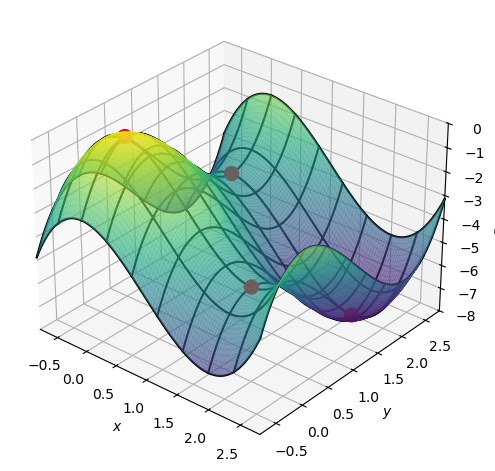

In [6]:
# Show points
list_of_stationary_points = [Matrix([x0,y0,f.subs([(x,x0),(y,y0)])]) for (x0,y0) in sols]
points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"s" : 100,"color":"red"})

# Show the surface f with the stationary points
pf = dtuplot.plot3d(f,(x,-0.8,2.8),(y,-0.8,2.8),use_cm=True, colorbar=False,show=False,wireframe=True,rendering_kw={"alpha":0.6})
pf.camera = {"azim" : -50, "elev" : 30}
pf.extend(points)
pf.show()

## Lokale ekstrema, eksempel 2

Vi betragter nu funktionen $f:\mathbb{R}^2 \to \mathbb{R}$ givet ved

\begin{equation*}
f(x,y) = x^4 + 4x^2y^2 + y^4 -4x^3 - 4y^3 + 2
\end{equation*}

Definitionsmængden er hele $\mathbb{R}^2$, altså er der ingen rand- eller undtagelsespunkter vi bør undersøge. Derfor nøjes vi med at undersøge de stationære punkter.

In [7]:
x,y = symbols('x y', real=True)

f = x ** 4 + 4 * x**2 * y ** 2 + y ** 4 - 4 * x ** 3 - 4 * y ** 3 + 2
lign1 = Eq(f.diff(x),0)
lign2 = Eq(f.diff(y),0)
lign1,lign2,f

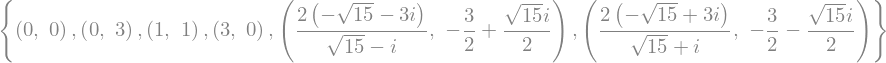

In [8]:
sols = nonlinsolve([lign1,lign2], [x, y])
sols

In [9]:
[(N(xsol),N(ysol)) for (xsol,ysol) in sols]

$\verb|nonlinsolve()|$ tager ikke højde for hvordan vi har defineret vores variable, så selvom vi har prøvet at definere $x,y$ med $\verb|real=True|$, skal man her selv bruge hovedet. Vi kan her se, at der findes fire (reelle) stationære punkter. Nemlig:

In [10]:
stat_punkter = list(sols)[:-2] # Remove the last two elements (complex solutions) with list-slicing
stat_punkter

Lad os finde Hessematricen for at kunne undersøge punkterne.

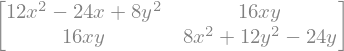

In [11]:
H = dtutools.hessian(f)
H

Vi indsætter de stationære punkter og da $\boldsymbol{H}_f$ ikke er diagonaliseret på forhånd som i sidste eksempel, må vi bede SymPy om egenværdierne

In [12]:
Hesse_matricer = [H.subs([(x,x0),(y,y0)]) for x0,y0 in stat_punkter]
Eig_Hesse_matricer = [h.eigenvals() for h in Hesse_matricer]

display(*zip(stat_punkter,Eig_Hesse_matricer))

Heraf kan vi aflæse at $f$ har egenligt minimum i både $(0,3)$ og $(3,0)$. Vi kan se at $(1,1)$ er saddelpunkt og ikke et ekstremum, da der både er positiv og negativ egenværdi. 

Da $\boldsymbol{H}_f((0,0))$ har mindst en egenværdi som er er nul, er vi nødt til at lave en særundersøgelse af punktet $(0,0)$. Lad os prøve at se hvordan $f$ opfører sig på linjen $y=x$.

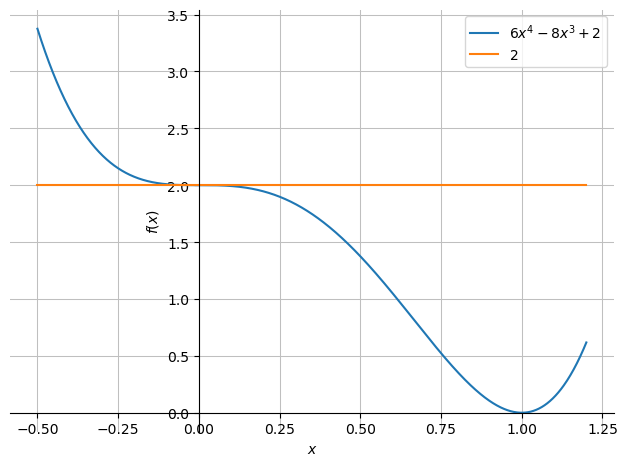

In [13]:
dtuplot.plot(f.subs(y,x),2,(x,-0.5,1.2),axis_center="auto")

Allerede her er det meget tydeligt, at $(0,0)$ hverken er et minimums- eller maksimumspunkt. Vi kan undersøge dette lidt nærmere:

In [14]:
tmp = f.subs(y,x) - f.subs([(x,0),(y,0)])
display(tmp, tmp.factor())

Heraf kan vi se


$f(x,x) - f(0,0) > 0$ når $x < 0$ og $f(x,x) - f(0,0) < 0$, når $0 < x < \frac{4}{3}$

**Da $f(x,x)$ antager værdier der både er større og mindre end $f(0,0)$ for $(x,x)$ virkårligt tæt på $(0,0)$, kan $f$ ikke have ekstremum i $(0,0)$.**

Lad os se grafen for $f$ sammen med de stationære punkter.

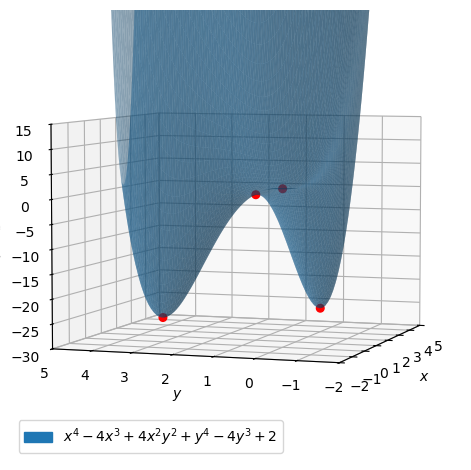

In [15]:
list_of_stationary_points = [Matrix([x0,y0,f.subs([(x,x0),(y,y0)])]) for (x0,y0) in stat_punkter]
points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"color":"red", "s" : 30})

pf = dtuplot.plot3d(f,(x,-2, 5),(y,-2, 4),xlim=(-2,5),ylim=(-2,5),zlim=(-30,15), show=False, rendering_kw={"alpha":0.5})
pf.camera = {"azim" : -161, "elev" : 5}
(pf + points).show()

## Globale ekstrema på begrænset og afsluttet mængde, eksempel 1

Vi betragter nu funktionen $f:\Omega \to \mathbb{R}$ med forskriften.

\begin{equation*}
f(x,y) = 3 + x - x ^ 2 - y ^ 2
\end{equation*}

Igen er $f$ veldefineret på hele $\mathbb{R}^2$, men denne gang er definitionsmængden begrænset ved 

\begin{equation*}
\Omega := \Bigl\{(x,y) \in [0,2]\times[-1,1]\quad |\quad y \leq 1-x\Bigr\},
\end{equation*}

altså den mængde der indesluttes af linjerne $y = -1$, $y = 1-x$ og $x=0$.

In [16]:
M = dtuplot.plot_implicit(Eq(x,0),Eq(y,1-x),Eq(y,-1), (1-x >= y) & (y >= -1) & (x >= 0),(x,-0.1,2.1),(y,-1.1,1.1), show=False, adaptive=True))
M.legend = False
M.show()

SyntaxError: unmatched ')' (2069157816.py, line 1)

Vi bemærker at $f$ er differentiabel over hele $\Omega$, så der er ingen undtagelsespunkter, vi skal tage hensyn til. Derfor er den også kontinuert på hele $\Omega$. Da $\Omega$ er afsluttet og begrænset, har $f$ derfor et globalt minimum og maksimum på $\Omega$. De to værdier må enten antages i **stationære punter** eller på **randen**.

Da $\Omega$ er en sammenhængende mængde, er værdimængden for $f(\Omega) = [m;M]$, hvor $m$ er det globale minimum, og $M$ er et globale maksimum.

Lad os først kigge på $f$'s niveaukurver

In [ ]:
f = 3 + x - x ** 2 - y ** 2
niveau = dtuplot.plot_contour(f,(x,-0.1,2.1),(y,-1.1,1.1),show=False)
niveau.extend(dtuplot.plot_implicit(Eq(x,0),Eq(y,1-x),Eq(y,-1),(x,-0.1,2.1),(y,-1.1,1.1),show=False))
niveau.show()

Lad os nu bestemme de **stationære punkter**.

In [ ]:
lign1 = Eq(f.diff(x),0)
lign2 = Eq(f.diff(y),0)
sols = nonlinsolve([lign1,lign2], [x,y])
sols

Vi kan se at punkter ligger i $\Omega$, og er derfor et relevant **stationært punkt.** Lad os plotte restriktionen af $f$ til hver af de tre randlinjer. 
Derefter findes de **stationære punkter** for disse tre randlinjer.

In [ ]:
dtuplot.plot(f.subs(y, -1),(x,0,2), title="Randlinjen f(x, -1)")

In [ ]:
dtuplot.plot(f.subs(y, 1-x),(x,0,2), title="Randlinjen f(x, 1-x)")

In [ ]:
dtuplot.plot(f.subs(x,0), (y,-1,1), ylim = (0,3),aspect="equal", title="Randlinjen f(0, y)")

In [ ]:
stat_punkter = set(sols)

lodret = solve(f.subs(x,0).diff(y))
vandret = solve(f.subs(y,-1).diff(x))
skrå = solve(f.subs(y,1-x).diff(x))

stat_punkter.update(set([(0,y0) for y0 in lodret]))
stat_punkter.update(set([(x0,-1) for x0 in vandret]))
stat_punkter.update(set([(x0,1-x0) for x0 in skrå]))
stat_punkter

Nu skal vi blot finde maksimum og minimum mellem de fundne stationære punkter og randlinjernes endepunkter, så $(0,1)$,
$(0,-1)$ og $(2,-1)$

In [ ]:
undersøgelses_punkter = list(stat_punkter) + [(0,1),(0,-1),(2,-1)]
f_værdier = [f.subs([(x,x0),(y,y0)]) for x0,y0 in undersøgelses_punkter]

minimum = min(f_værdier)
maximum = max(f_værdier)
f_værdier, minimum, undersøgelses_punkter[f_værdier.index(minimum)], maximum, undersøgelses_punkter[f_værdier.index(maximum)]

Nu har vi endelig:

Globalt minimum: $0$ i punktet $(2,-1)$  
Globalt maximum: $\frac{13}{4}$ i punktet $(\frac{1}{2},0)$  
Værdimængde: $[0,\frac{13}{4}]$

Lad os plotte det hele samlet

In [ ]:
u = symbols("u")
pf = dtuplot.plot3d(f,(x,0,2),(y,-1,1),show=False,rendering_kw={"alpha":0.7})
punkter = dtuplot.scatter([Matrix([2,-1,0]),Matrix([1/2,0,13/4])],show=False,rendering_kw={"color":"red","s":20})
l1 = dtuplot.plot3d_parametric_line(u,-1,f.subs({x:u,y:-1}),(u,0,2),use_cm=False,show=False,rendering_kw={"color":"red","linewidth":2})
l2 = dtuplot.plot3d_parametric_line(0,u,f.subs({x:0,y:u}),(u,-1,1),use_cm=False,show=False,rendering_kw={"color":"red","linewidth":2})
l3 = dtuplot.plot3d_parametric_line(u,1-u,f.subs({x:u,y:1-u}),(u,0,2),use_cm=False,show=False,rendering_kw={"color":"red","linewidth":2})
combined = (pf + punkter + l1 + l2 + l3)
combined.camera = {"azim" : 148, "elev" : 40}
combined.legend = False

combined.show()